<a href="https://colab.research.google.com/github/AkotoChristine/Online_Fraud_Detection/blob/main/Summative_Intro_to_ml_%5Bname_number%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Fraud Dection Prediction 

## Dataset 
**6,362,620 ROWS and 11 Columns**
 This dataset, sourced from Kaggle, contains historical transaction data aimed at identifying fraudulent online payments. It includes detailed information about each transaction, such as the transaction type, amount, and account balances before and after the transaction for both sender and recipient. A key feature is the isFraud column, which labels whether a transaction is fraudulent (1) or not (0). This labeled data makes it suitable for training supervised machine learning models for fraud classification.

## Importing Neccsary Library 

In [10]:
#Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight




In [11]:
data=pd.read_csv('onlinefraud.csv')  
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
data.shape

(6362620, 11)

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [17]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [18]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [19]:
data['isFraud'].value_counts(normalize=True)


isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

In [20]:
data['type'].nunique() #df['nameDest'].nunique()


5

In [21]:
data['step'].nunique()


743

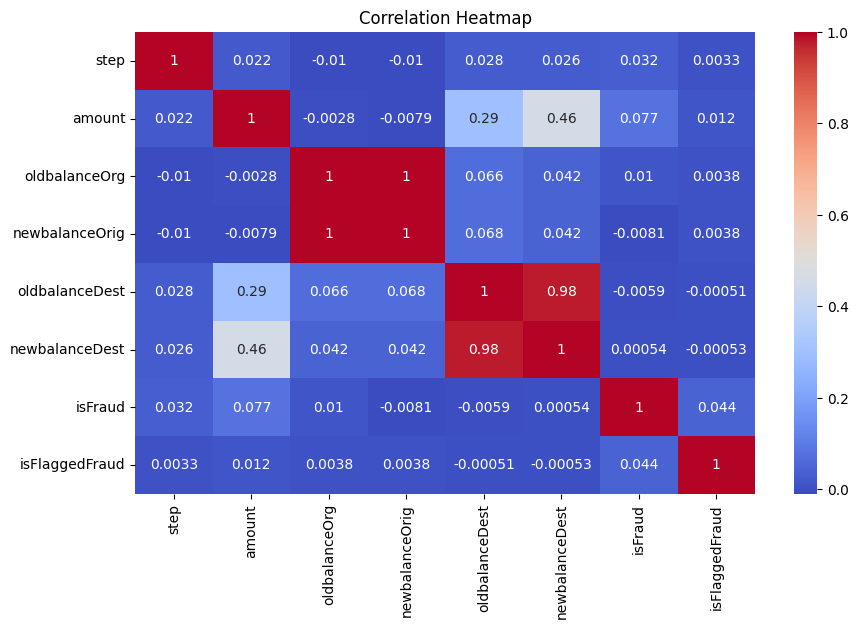

In [22]:
numeric_df = data.select_dtypes(include="number")
corr = numeric_df.corr()  # Get correlation matrix

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [23]:
(data['oldbalanceOrg'] == data["oldbalanceDest"]).value_counts()

False    5586475
True      776145
Name: count, dtype: int64

In [24]:
(data['newbalanceOrig'] == data["oldbalanceOrg"]).value_counts()

False    4273583
True     2089037
Name: count, dtype: int64

# Data preprocessing 

In [25]:
data['type'] = data['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [27]:
#dropping data['isFlaggedFraud'] since it wont be needed 
data = data.drop('isFlaggedFraud', axis = 1)

In [28]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [29]:
# Select features and target
features = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
            'oldbalanceDest', 'newbalanceDest']

X = data[features]
y = data['isFraud']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [84]:

# #applying this because the dataset is not balanced
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)  
# X_train_resampled = X_train_resampled[:2000]
# y_train_resampled = y_train_resampled[:2000]


In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# X_test = X_test[:2000]
# y_test = y_test[:2000]



# SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
![Model Architecture](iMAGE.png)




## Task: Define a function that creates models without and With specified Optimization techniques

In [33]:
# Define a function to create models with optimization techniques
def define_model(optimizer, regularization, early_stopping, dropout, learning_rate, layers):
    model = Sequential()
    for units in layers:
        model.add(Dense(units, activation='relu', kernel_regularizer=regularization))
        if dropout:
            model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Task: Print out the Final Model Accuracy and plot the Loss curve

In [94]:

def plot_loss_curve(history, model_name='Model'):
    """
    Plot the loss curve for a given model.
    """
    train_losses = history.history['loss']
    val_losses = history.history['val_loss']
    
    plt.plot(train_losses, 'bo-', label='Training Loss')   # Blue dots
    plt.plot(val_losses, 'r-', label='Validation Loss')    # Red line
    plt.title(f'{model_name} Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Computing metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1= f1_score(y_test, y_pred, average='binary')

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NotFraud', 'Fraud'],
            yticklabels=['NotFraud', 'Fraud'])  # Assuming 0=NotFraud, 1=Fraud

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_test, y_pred_probs)
    print(f"AUC: {auc}")
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

In [36]:
import pandas as pd
from sklearn.utils import resample

# Combine X_test and y_test into a single DataFrame
X_test_df = pd.DataFrame(X_test)
X_test_df['label'] = y_test.values  # add labels as a new column

# Separate majority and minority classes
class_0 = X_test_df[X_test_df['label'] == 0]
class_1 = X_test_df[X_test_df['label'] == 1]

# Downsample majority class (class_0) to match minority class size (class_1)
class_0_downsampled = resample(class_0, 
                              replace=False,            # sample without replacement
                              n_samples=len(class_1),  # downsample to minority class size
                              random_state=42)

# Combine minority class with downsampled majority class
balanced_test_df = pd.concat([class_0_downsampled, class_1])

# Shuffle the resulting balanced dataset
balanced_test_df = balanced_test_df.sample(frac=1, random_state=42)

# Split back into features and labels
X_test_balanced = balanced_test_df.drop('label', axis=1)
y_test_balanced = balanced_test_df['label']


y_test_balanced.value_counts()


label
0    1208
1    1208
Name: count, dtype: int64

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [ ]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# classes = np.array([0, 1])
# weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
# class_weights = dict(zip(classes, weights))
# print("Class Weights:", class_weights)

In [38]:
# Model 1: Adam optimizer, L2 regularization, Early stopping
class_weights = {0: 0.501, 1: 388.75}
model_1 = define_model(Adam, l2(0.01), True, 0.2, 0.001, [64, 32])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history_1 = model_1.fit(X_train, y_train, epochs=100, batch_size=256, verbose=1, class_weight=class_weights,validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
17398/17398 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - accuracy: 0.8441 - loss: 0.4202 - val_accuracy: 0.8832 - val_loss: 0.3334
Epoch 2/100
17398/17398 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - accuracy: 0.8983 - loss: 0.2966 - val_accuracy: 0.9119 - val_loss: 0.3128
Epoch 3/100
17398/17398 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - accuracy: 0.9159 - loss: 0.2678 - val_accuracy: 0.9606 - val_loss: 0.1974
Epoch 4/100
17398/17398 ━━━━━━━━━━━━━━━━━━━━ 119s 7ms/step - accuracy: 0.9196 - loss: 0.2508 - val_accuracy: 0.9309 - val_loss: 0.2288
Epoch 5/100
17398/17398 ━━━━━━━━━━━━━━━━━━━━ 61s 4ms/step - accuracy: 0.9184 - loss: 0.2474 - val_accuracy: 0.9637 - val_loss: 0.1751
Epoch 6/100
17398/17398 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - accuracy: 0.9219 - loss: 0.2392 - val_accuracy: 0.9153 - val_loss: 0.2552
Epoch 7/100
17398/17398 ━━━━━━━━━━━━━━━━━━━━ 131s 7ms/step - accuracy: 0.9224 - loss: 0.2352 - val_accuracy: 0.8885 - val_loss: 0.2977
Epoch 8/100
17398/17398 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - 

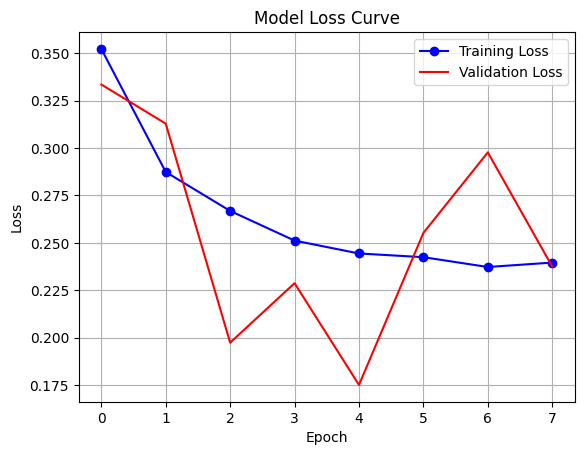

In [95]:
plot_loss_curve(history_1)


29825/29825 ━━━━━━━━━━━━━━━━━━━━ 19s 647us/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    953185
           1       0.02      0.98      0.03      1208

    accuracy                           0.92    954393
   macro avg       0.51      0.95      0.49    954393
weighted avg       1.00      0.92      0.96    954393



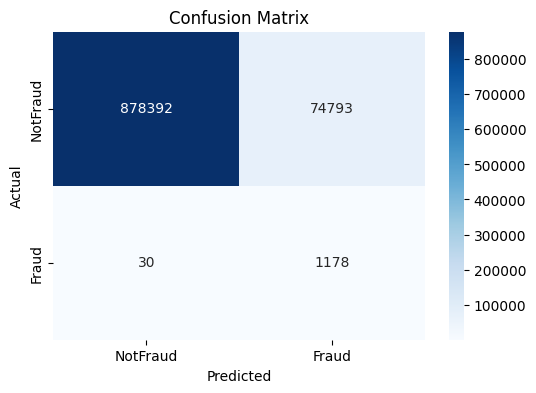

AUC: 0.9914182390672304


{'accuracy': 0.9216014786361593,
 'precision': 0.015505916731384344,
 'recall': 0.9751655629139073,
 'f1_score': 0.03052643853898081}

In [97]:
# The data set was very skewed with not fraud cased being 99.8% of the data set. The model had a high accuracy but cant predict correctly. Hence, There will be a balanced X_test and y_test and y_test_balanced so see if the model can predict correctly.
evaluate_model(model_1, X_test, y_test)

## The data set is very skewed with "not fraud" cases being 99.8% of the data set. The model had a high accuracy but cant predict correctly. Hence, I balanced the X_test and y_test so the model can predict correctly.


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1208
           1       0.93      0.98      0.95      1208

    accuracy                           0.95      2416
   macro avg       0.95      0.95      0.95      2416
weighted avg       0.95      0.95      0.95      2416



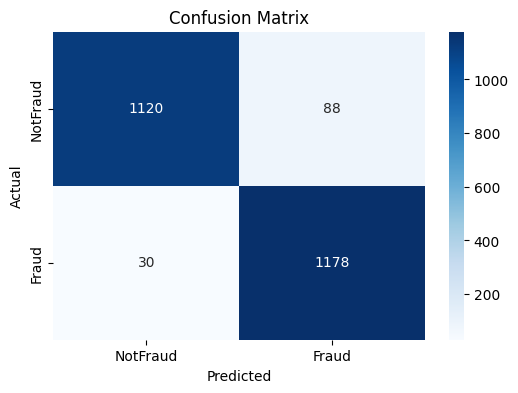

AUC: 0.991876726897943


{'accuracy': 0.9511589403973509,
 'precision': 0.9304897314375987,
 'recall': 0.9751655629139073,
 'f1_score': 0.952303961196443}

In [41]:
evaluate_model(model_1, X_test_balanced, y_test_balanced)

In [42]:
#Model 2: RMSprop optimizer, L1 regularization, No Early stopping
model_2 = define_model(RMSprop, l1(0.01), False, 0.2, 0.001, [64, 32])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history_2 = model_2.fit(X_train, y_train, epochs=100, batch_size=512, verbose=1, class_weight=class_weights,validation_data=(X_val, y_val))

Epoch 1/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 86s 9ms/step - accuracy: 0.7928 - loss: 0.7497 - val_accuracy: 0.8710 - val_loss: 0.3876
Epoch 2/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 155s 11ms/step - accuracy: 0.8261 - loss: 0.4740 - val_accuracy: 0.8720 - val_loss: 0.3774
Epoch 3/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 49s 6ms/step - accuracy: 0.8458 - loss: 0.4377 - val_accuracy: 0.9105 - val_loss: 0.3399
Epoch 4/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.8686 - loss: 0.4114 - val_accuracy: 0.9375 - val_loss: 0.2858
Epoch 5/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.8740 - loss: 0.3945 - val_accuracy: 0.9644 - val_loss: 0.2256
Epoch 6/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.8810 - loss: 0.3764 - val_accuracy: 0.9244 - val_loss: 0.2818
Epoch 7/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.8817 - loss: 0.3598 - val_accuracy: 0.9631 - val_loss: 0.2143
Epoch 8/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 120s 14ms/step - accuracy: 0.88

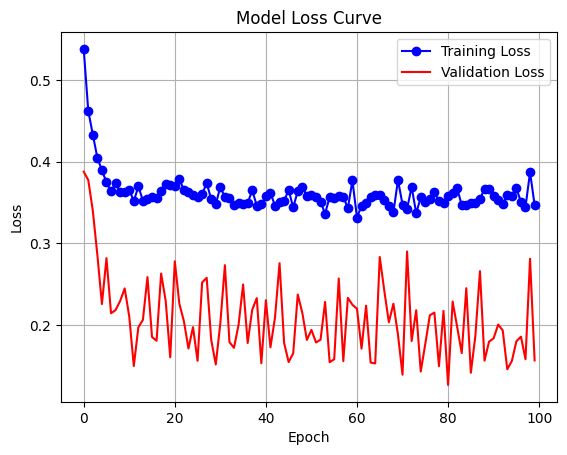

In [96]:
plot_loss_curve(history_2)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1208
           1       0.98      0.89      0.94      1208

    accuracy                           0.94      2416
   macro avg       0.94      0.94      0.94      2416
weighted avg       0.94      0.94      0.94      2416



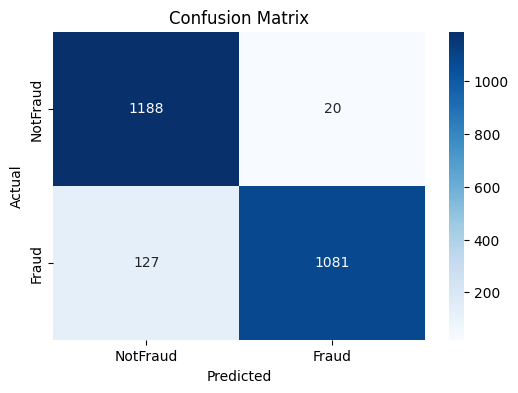

AUC: 0.9915937075128285


{'accuracy': 0.9391556291390728,
 'precision': 0.9818346957311535,
 'recall': 0.8948675496688742,
 'f1_score': 0.9363360762234734}

In [44]:
evaluate_model(model_2, X_test_balanced, y_test_balanced)

In [49]:
model_3 = define_model(SGD, l1(0.01), True, 0.3, 0.001, [128, 64, 32])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history_3 = model_3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, class_weight =class_weights ,validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - accuracy: 0.6367 - loss: 9.1346 - val_accuracy: 0.8473 - val_loss: 3.8158
Epoch 2/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.8407 - loss: 2.8158 - val_accuracy: 0.8481 - val_loss: 0.9904
Epoch 3/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8259 - loss: 0.8785 - val_accuracy: 0.8194 - val_loss: 0.6600
Epoch 4/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8241 - loss: 0.6552 - val_accuracy: 0.8175 - val_loss: 0.6093
Epoch 5/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8244 - loss: 0.6214 - val_accuracy: 0.8108 - val_loss: 0.5963
Epoch 6/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8221 - loss: 0.6065 - val_accuracy: 0.8043 - val_loss: 0.5918
Epoch 7/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.8225 - loss: 0.5922 - val_accuracy: 0.8218 - val_loss: 0.5687
Epoch 8/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.8218 - loss: 0

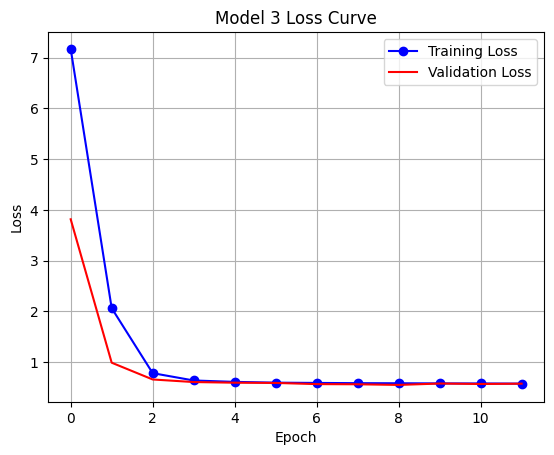

In [55]:
plot_loss_curve(history_3, model_name='Model 3')


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1208
           1       0.83      0.90      0.86      1208

    accuracy                           0.86      2416
   macro avg       0.86      0.86      0.86      2416
weighted avg       0.86      0.86      0.86      2416



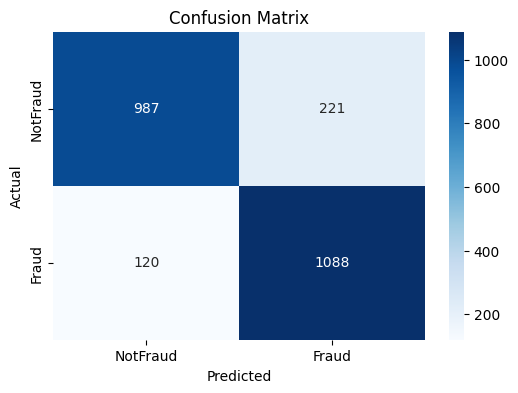

AUC: 0.9375157613701153


{'accuracy': 0.8588576158940397,
 'precision': 0.8311688311688312,
 'recall': 0.9006622516556292,
 'f1_score': 0.8645212554628526}

In [56]:
evaluate_model(model_3, X_test_balanced, y_test_balanced)

In [57]:
from tensorflow.keras.optimizers import AdamW


In [58]:

model_4 = define_model(AdamW, l2(0.01), True, 0.3, 0.001, [256, 128, 64])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history_4 = model_4.fit(X_train, y_train, epochs=50, batch_size=512,class_weight=class_weights, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 0.8501 - loss: 0.5692 - val_accuracy: 0.7730 - val_loss: 0.4342
Epoch 2/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 54s 6ms/step - accuracy: 0.8901 - loss: 0.3309 - val_accuracy: 0.9883 - val_loss: 0.1684
Epoch 3/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 57s 7ms/step - accuracy: 0.9009 - loss: 0.3128 - val_accuracy: 0.9716 - val_loss: 0.1993
Epoch 4/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 154s 15ms/step - accuracy: 0.9152 - loss: 0.2954 - val_accuracy: 0.9570 - val_loss: 0.2300
Epoch 5/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 141s 16ms/step - accuracy: 0.9111 - loss: 0.2841 - val_accuracy: 0.9757 - val_loss: 0.1645
Epoch 6/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 147s 17ms/step - accuracy: 0.9174 - loss: 0.2763 - val_accuracy: 0.8058 - val_loss: 0.4479
Epoch 7/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 91s 10ms/step - accuracy: 0.9182 - loss: 0.2726 - val_accuracy: 0.9353 - val_loss: 0.2513
Epoch 8/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 74s 9ms/step - accuracy: 0.9146 - 

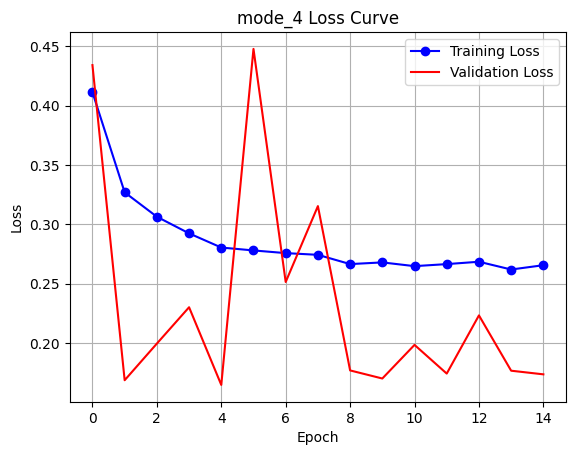

In [59]:
plot_loss_curve(history_4, model_name='mode_4')


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1208
           1       0.97      0.88      0.92      1208

    accuracy                           0.92      2416
   macro avg       0.93      0.92      0.92      2416
weighted avg       0.93      0.92      0.92      2416



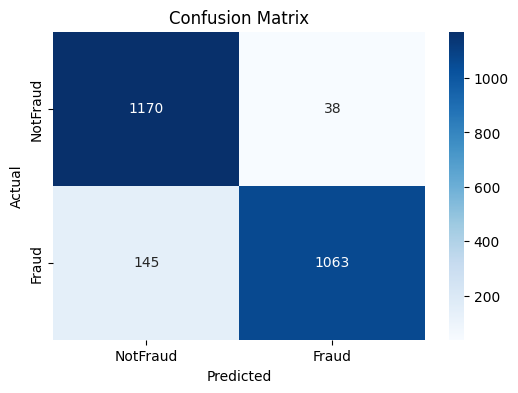

AUC: 0.986704941669225


{'accuracy': 0.9242549668874173,
 'precision': 0.9654859218891917,
 'recall': 0.8799668874172185,
 'f1_score': 0.920744911216977}

In [61]:
evaluate_model(model_4, X_test_balanced, y_test_balanced)

In [83]:
from tensorflow.keras.optimizers import Nadam
model_5 = define_model(Nadam, None, True, 0.4, 0.0005, [256, 128, 64, 32])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history_5 = model_5.fit(
    X_train, y_train,
    epochs=60,
    batch_size=512,
    verbose=1,
    class_weight=class_weights,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/60
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 103s 11ms/step - accuracy: 0.8264 - loss: 0.3707 - val_accuracy: 0.9310 - val_loss: 0.1860
Epoch 2/60
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 113s 13ms/step - accuracy: 0.9298 - loss: 0.2049 - val_accuracy: 0.9232 - val_loss: 0.1688
Epoch 3/60
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 153s 18ms/step - accuracy: 0.9249 - loss: 0.1659 - val_accuracy: 0.9088 - val_loss: 0.1761
Epoch 4/60
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 122s 14ms/step - accuracy: 0.9263 - loss: 0.2704 - val_accuracy: 0.9319 - val_loss: 0.1428
Epoch 5/60
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 107s 12ms/step - accuracy: 0.9461 - loss: 0.1774 - val_accuracy: 0.9433 - val_loss: 0.1273
Epoch 6/60
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 148s 17ms/step - accuracy: 0.9394 - loss: 0.1715 - val_accuracy: 0.9702 - val_loss: 0.0819
Epoch 7/60
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 110s 13ms/step - accuracy: 0.9454 - loss: 0.1782 - val_accuracy: 0.9566 - val_loss: 0.1317
Epoch 8/60
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 90s 10ms/step - accuracy: 0

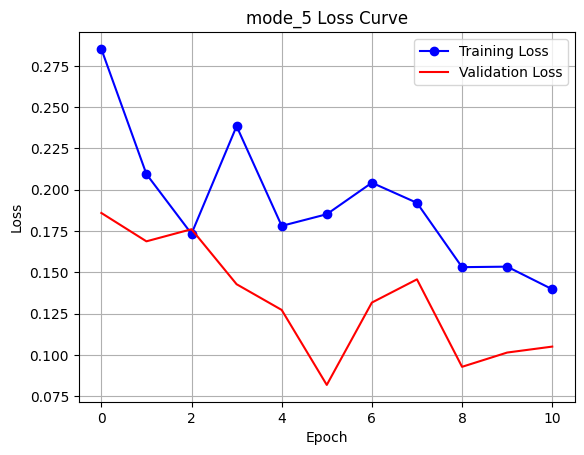

In [86]:
plot_loss_curve(history_5, model_name='mode_5')

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1208
           1       0.97      0.96      0.96      1208

    accuracy                           0.96      2416
   macro avg       0.96      0.96      0.96      2416
weighted avg       0.96      0.96      0.96      2416



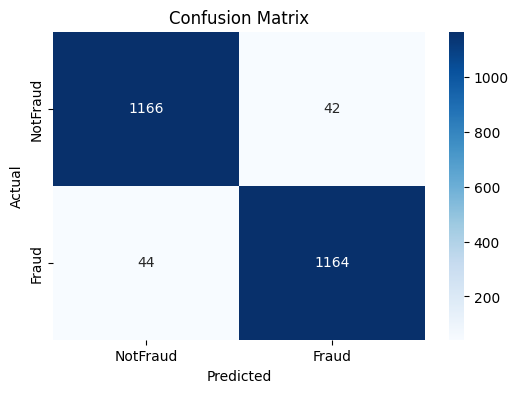

AUC: 0.9951458406429543


{'accuracy': 0.9644039735099338,
 'precision': 0.9651741293532339,
 'recall': 0.9635761589403974,
 'f1_score': 0.9643744821872411}

In [87]:
evaluate_model(model_5, X_test_balanced, y_test_balanced)

## A Logistic Regression Model

In [75]:
from sklearn.linear_model import LogisticRegression

def fifth_model():
    return LogisticRegression(C=0.5,
                              penalty='l2',
                              solver='lbfgs',
                              max_iter=100,
                              random_state=42)

logistic_model = fifth_model()
logistic_model.fit(X_train, y_train)

LogisticRegression(C=0.5, random_state=42)

In [76]:
y_pred_prob = logistic_model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
y_pred
     

array([0, 0, 0, ..., 0, 0, 0])


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1208
           1       0.95      0.95      0.95      1208

    accuracy                           0.95      2416
   macro avg       0.95      0.95      0.95      2416
weighted avg       0.95      0.95      0.95      2416



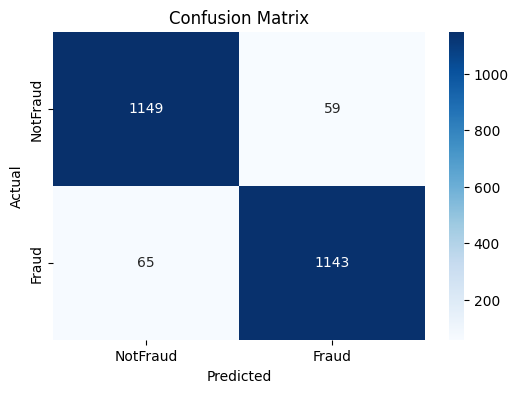

AUC: 0.9486754966887418


{'accuracy': 0.9486754966887417,
 'precision': 0.9509151414309485,
 'recall': 0.9461920529801324,
 'f1_score': 0.9485477178423236}

In [74]:
evaluate_model(logistic_model, X_test_balanced, y_test_balanced)

# MODELS SAVED

#### Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later 


### yes, I realised I should ahave saved , I had to run all after my kernel disconnected for a couple of times 

In [98]:

# Save all those models
import pickle

models = {
    'model_1': model_1,
    'model_2': model_2,
    'model_3': model_3,
    'model_4': model_4,
    'model_5': model_5,
    'model_6': logistic_model
}

def save_models(models, save_dir='saved_models'):
    import os
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for model_name, model in models.items():
        model_path = os.path.join(save_dir, f"{model_name}.pkl")
        with open(model_path, 'wb') as file:
            pickle.dump(model, file)
        print(f"Saved {model_name} to {model_path}")

In [ ]:
save_models(models)

Saved model_1 to saved_models\model_1.pkl
Saved model_2 to saved_models\model_2.pkl
Saved model_3 to saved_models\model_3.pkl
Saved model_4 to saved_models\model_4.pkl
Saved model_5 to saved_models\model_5.pkl
Saved model_6 to saved_models\model_6.pkl


 # Task: Make Predictions using the best saved model 


In [101]:
def make_predictions(model_path, x_test):

    # Load the model
    with open(model_path, 'rb') as file:
      model = pickle.load(file)
    # Make predictions
    predictions = model.predict(x_test)
    # Convert probabilities to binary labels (0 or 1)

    return predictions


In [126]:
model_path = 'saved_models/model_5.pkl'
prediction = make_predictions(model_path, X_test_balanced)
# Convert probabilities to class labels (threshold = 0.5)
binary_preds = (prediction > 0.5).astype(int).flatten()

print(binary_preds)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[0 0 1 ... 0 1 0]


In [127]:
prediction_counts = pd.Series(binary_preds).value_counts()
print(prediction_counts)

0    1210
1    1206
Name: count, dtype: int64


# Congratulations!! 
